In [1]:
from scipy import stats
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### SEM - stardard error of the mean
#### desvio padrão da média
#### não confunda SD, SSD e SEM

  - <font size="4">$\sigma$</font> ou SD - é o desvio padrão populacional
  - SSD - Sample SD - desvio padrão amostral (o quer normalmente temos ao colher dados de um experimento)
  - SEM - O queanto estamos certos da média:
    - se n = 1 SEM == SSD
    - de acordo com que n cresce SEM descresce, diminuindo a incerteza sobre a méaia
    - se n tende a infinito, SEM tende a zero - certeza quase absoluta sobre a media

<font size="5">$SEM = \frac{SSD}{\sqrt{n}}$</font>

### Vamos plotar a diferença entre as distribuições de acordo com Gosset (distribuição t)

In [2]:
mus = [1, 3]
sds = [0.3, 0.8]
N = 5

samp1 = np.random.normal(mus[0], sds[0], N)
samp2 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([samp1, samp2]).T
df.columns=['dist1', 'dist2']

# stack das duas distribuições
df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)
df2.head(3)

,val,class
0,1.197072,um
1,1.383301,um
2,1.166941,um


### Criando o eixo x

In [3]:
seqxs = []
seqx1 = np.linspace(stats.norm.ppf(0.01, mus[0], sds[0]), stats.norm.ppf(0.99, mus[0], sds[0]), 100)
seqxs.append(seqx1)
seqx1[:5], seqx1[-10:-1]

(array([0.30209564, 0.31619472, 0.33029379, 0.34439287, 0.35849195]),
 array([1.57101266, 1.58511174, 1.59921082, 1.61330989, 1.62740897,
        1.64150805, 1.65560713, 1.66970621, 1.68380528]))

In [4]:
seqx2 = np.linspace(stats.norm.ppf(0.01, mus[1], sds[1]), stats.norm.ppf(0.99, mus[1], sds[1]), 100)
seqxs.append(seqx2)
seqx2[:5], seqx2[-10:-1]

(array([1.1389217 , 1.17651924, 1.21411678, 1.25171432, 1.28931187]),
 array([4.52270043, 4.56029797, 4.59789551, 4.63549305, 4.67309059,
        4.71068813, 4.74828568, 4.78588322, 4.82348076]))

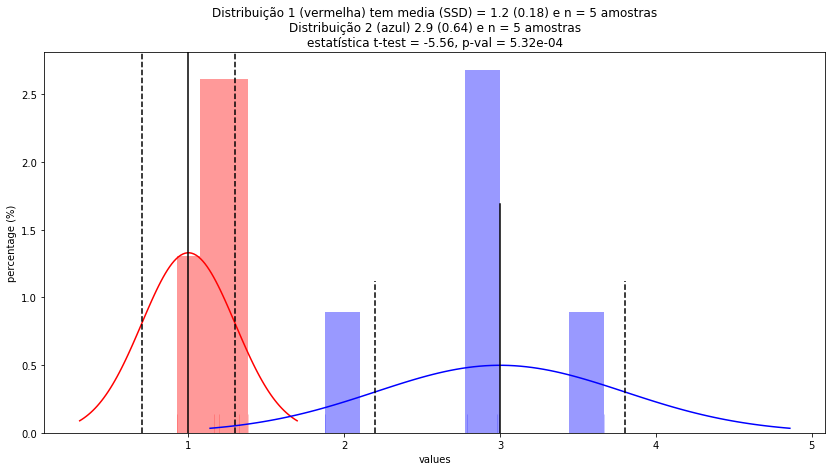

In [5]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 7))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,})
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i])

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

plt.axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
plt.axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
plt.axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

plt.axvline(x=mus[1], ymin=0, ymax=.6, color='black')
plt.axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
plt.axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD     = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)

sta, pval = stats.ttest_ind(df.dist1, df.dist2)
text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)
    
plt.xlabel("values")
plt.ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat
plt.title(title);

### A distribuição das diferenças

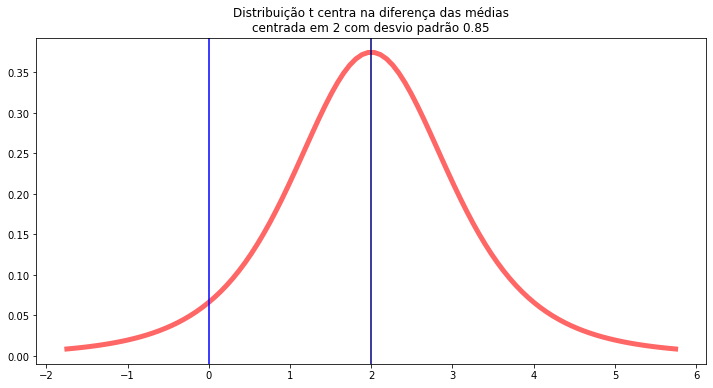

In [6]:
degfree = N-1
x = np.linspace(stats.t.ppf(0.01, degfree), stats.t.ppf(0.99, degfree), 100)

diff = mus[1] - mus[0]
sd_diff = np.sqrt(sds[0]**2 + sds[1]**2)

ys = stats.t.pdf(x, degfree)
xs = x + diff

title = 'Distribuição t centra na diferença das médias'
title += '\ncentrada em %d com desvio padrão %.2f'%(diff, sd_diff)

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'r-', lw=5, alpha=0.6, label='t pdf')
plt.axvline(x=0, ymin=0, ymax=1, color='blue');
plt.axvline(x=diff, ymin=0, ymax=1, color='navy');
plt.title(title);

### Intervalo de confiança (confidence interval CI)

<font size="5">$CI = [mean - \Phi(alpha) * \frac{SSD}{\sqrt{n}}, mean + \Phi(1-alpha) * \frac{SSD}{\sqrt{n}}]$</font>

### SEM

<font size="5">$SEM = \frac{SSD}{\sqrt{n}}$</font>


<font size="5">$\gamma_{inf} = \Phi(alpha)$</font>  


<font size="5">$\gamma_{sup} = \Phi(1-alpha)$</font>  



### Intervalo de confiança (confidence interval CI)

<font size="5">$CI = [mean - \gamma_{inf} * SEM, mean + \gamma_{sup} * SEM]$</font>

### Se distribuição normal

In [7]:
alpha = 0.05/2

fi_inf = stats.norm.ppf(alpha, 0, 1)
fi_sup = stats.norm.ppf(1-alpha, 0, 1)

fi_inf, fi_sup

(-1.9599639845400545, 1.959963984540054)

### Se distribuição t-student

In [8]:
alpha = 0.05/2
degfree = N-1

fi_inf = stats.t.ppf( alpha, degfree)
fi_sup = stats.t.ppf( (1-alpha), degfree)

N, degfree, fi_inf, fi_sup

(5, 4, -2.7764451051977996, 2.7764451051977987)

In [9]:
def calc_fi(N=None, is_normal=True, alpha=.05):
    
    alpha /= 2
    if is_normal:
        fi_inf = stats.norm.ppf(alpha, 0, 1)
        fi_sup = stats.norm.ppf(1-alpha, 0, 1)
    else:
        degfree = N-1

        fi_inf = stats.t.ppf( alpha, degfree)
        fi_sup = stats.t.ppf( (1-alpha), degfree)
        
    return np.array( [fi_inf, fi_sup])

def calc_ttest(vals1, vals2):
    
    sta, pval = stats.ttest_ind(vals1, vals2)
    text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

    if pval >= 0.05:
        text_stat += "\nnão se refuta H0: distribuições estatisticamente similares"
    else:
        text_stat += "\nadota-se a Ha: distribuições estatisticamente diferentes"
    
    return text_stat, sta, pval


In [10]:
fis = calc_fi(N=N, is_normal=False)
fis

array([-2.77644511,  2.77644511])

In [11]:
SEM = sd_diff/np.sqrt(N)

CI = (fis * SEM) + diff
CI

diff, sd_diff, SEM, CI

(2, 0.8544003745317532, 0.38209946349085605, array([0.93912181, 3.06087819]))

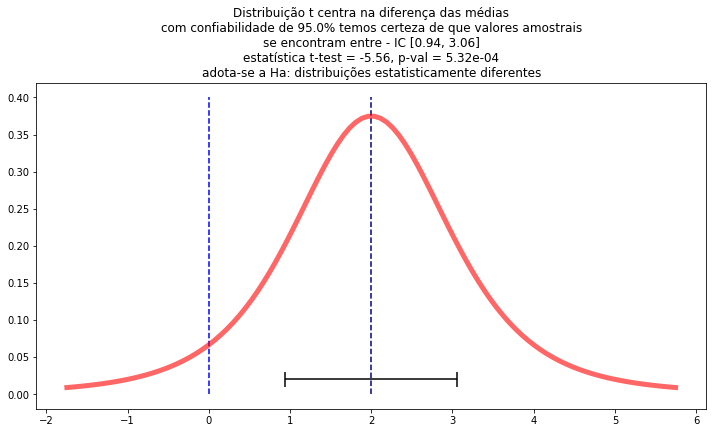

In [12]:
degfree = N-1
alpha = 0.05
x = np.linspace(stats.t.ppf(0.01, degfree), stats.t.ppf(0.99, degfree), 100)

diff = mus[1] - mus[0]
sd_diff = np.sqrt(sds[0]**2 + sds[1]**2)

fis = calc_fi(N=N, alpha=alpha, is_normal=False)
SEM = sd_diff/np.sqrt(N)
CI = (fis * SEM) + diff

ys = stats.t.pdf(x, degfree)
xs = x + diff

title = 'Distribuição t centra na diferença das médias'

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'r-', lw=5, alpha=0.6, label='t pdf')

plt.vlines( x=0, ymin=0, ymax=.4, color='blue', linestyle='--')
plt.vlines( x=diff, ymin=0, ymax=.4, color='navy', linestyle='--')

y = .02; del_y = 0.01
plt.hlines(y, CI[0], CI[1], color = 'black', linestyle='-')
plt.vlines(x=CI[0], ymin=y-del_y, ymax=y+del_y, color='black', linestyle='-')
plt.vlines(x=CI[1], ymin=y-del_y, ymax=y+del_y, color='black', linestyle='-')

title += '\ncom confiabilidade de %.1f%% temos certeza de que valores amostrais'%((1-alpha)*100)
title += '\nse encontram entre - IC [%.2f, %.2f]\n'%(CI[0], CI[1])

text_stat, sta, pval = calc_ttest(samp1, samp2)
title += text_stat

plt.title(title);

### O que é o intervalo de confiança?
  - É tua barra de erro!
  - Logo, sempre que apresentar os dados, não se esqueça de colocar:
    - a porcentagem de confiança = (1-alpha) * 100% --> neste caso 95%
    - o N amostral
    - o intervalo de confiança
    - p-value da estatística t
    - o Tamanho do Efeito, e a diferença entre as médias
    
Se depois de tudo que calcular a diferença for 2 pMol, e 2 pMol não são suficiente para alterar a resposta celular, então a estatística pode ser significativa, mas a biologia molecular descarta os resultados.    